<h3>Import kruft

In [1]:
import pyspark as ps
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc, asc
from pyspark.streaming import StreamingContext

from pyspark.ml.feature import StopWordsRemover

#plotting
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

import pandas as pd
import socket

<h3>Initialize Spark Context

In [2]:
conf = SparkConf().setMaster("local[2]").setAppName("hello_pygotham")
sc = SparkContext(conf=conf)
sc

<SparkContext master=local[2] appName=spark_streaming_funtime>

In [3]:
#SQLContext allows us to query results with SQL-like syntax
sqlContext = SQLContext(sc)

<h3>Initialize Spark Streaming Context

In [4]:
ssc = StreamingContext(sc, 5)      #5 second microbatches
ssc

<h3>Import external dataset

We'll be using the ANEW (Affective Norms of English Words) data set. More info: http://www.uvm.edu/pdodds/teaching/courses/2009-08UVM-300/docs/others/everything/bradley1999a.pdf.

**Measurements of mean reactions to words (1-9 scale)**
- Good to bad (psychological valence)
- Active to passive (arousal)
- Strong to weak (dominance)

In [1]:
#load ANEW data set
anew_dict = {}
with open("all.csv", "r") as rf:
    anew = [x for x in rf.read().splitlines()]
    for line in anew:
        (key, value) = line.split(",", 1)
        value = value.split(",")
        anew_dict[key] = value

In [2]:
#contains mean valence, dominance and arousal scores for a corpus of English words
anew_dict.get("Description")

['Word No.',
 'Valence Mean',
 'Valence SD',
 'Arousal Mean',
 'Arousal SD',
 'Dominance Mean',
 'Dominance SD',
 'Word Frequency']

In [3]:
anew_dict.get("grin")

['773', '7.40', '1.87', '5.27', '2.64', '6.00', '1.86', '13']

In [4]:
anew_dict.get("horse")

['214', '5.89', '1.55', '3.89', '2.17', '4.67', '1.60', '117']

<h3>Define streaming data input

In [10]:
#see bin/TweetRead.py. ifconfig in terminal will get you host ip
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.connect(("8.8.8.8", 80))
ip = (sock.getsockname()[0])
port = 5555

#our data input
stream = ssc.socketTextStream(ip, port)

In [11]:
window_time = 10
lines = stream.window( window_time )

In [13]:
#not a comprehensive set, but we're just fooling around anyway
stopwords = StopWordsRemover.loadDefaultStopWords("english")

In [14]:
#attempt to use ANEW dataset
(lines.flatMap(lambda x : x.split(" "))   #split each tweet by space
              .filter(lambda x: x.lower() not in stopwords)  #remove english stopwords, words not in ANEW
              .filter(lambda x : x.lower() in anew_dict)
              .map(lambda word : (word.lower(), anew_dict.get(word.lower())[3], anew_dict.get(word.lower())[5], 1))   #lookup anew arousal and dominance scores, if available
              .foreachRDD(lambda rdd : rdd.toDF().registerTempTable("tweets")))

<b>Note: Nothing's happening just yet.

In [15]:
ssc.start()

<b>Now stuff is happening! Yay!

<h3>Some simple visualizations



2017-10-03 19:30:08.174264
          _1    _2    _3  sum(_4)
0  hurricane  6.83  3.07       38
1      paper  2.50  4.47       37
2       hate  6.95  5.05       24
3     people  5.94  6.14       21
4       good  5.43  6.41       13


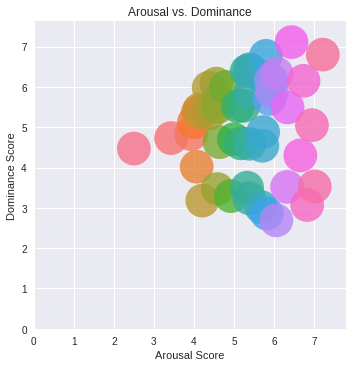

2017-10-03 19:30:27.281254
          _1    _2    _3  sum(_4)
0  hurricane  6.83  3.07       35
1      paper  2.50  4.47       30
2     people  5.94  6.14       26
3       hate  6.95  5.05       21
4        man  5.24  5.53       11


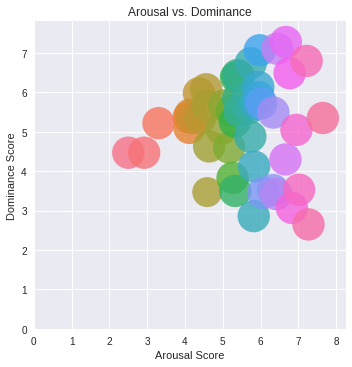

2017-10-03 19:30:44.079810
          _1    _2    _3  sum(_4)
0  hurricane  6.83  3.07       33
1      paper  2.50  4.47       30
2     people  5.94  6.14       29
3       hate  6.95  5.05       24
4       good  5.43  6.41       11


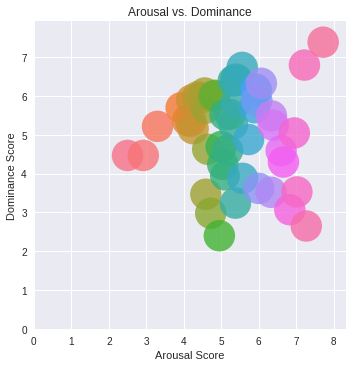

2017-10-03 19:31:00.907808
          _1    _2    _3  sum(_4)
0      paper  2.50  4.47       37
1     people  5.94  6.14       32
2  hurricane  6.83  3.07       31
3       hate  6.95  5.05       22
4       good  5.43  6.41       15


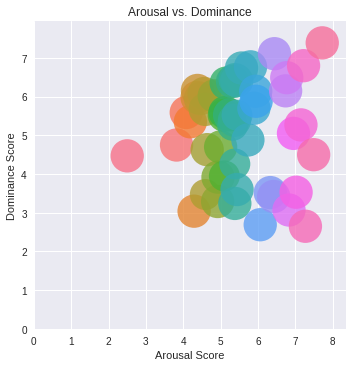

2017-10-03 19:31:16.781361
          _1    _2    _3  sum(_4)
0     people  5.94  6.14       36
1  hurricane  6.83  3.07       31
2      paper  2.50  4.47       28
3       hate  6.95  5.05       17
4       good  5.43  6.41       17


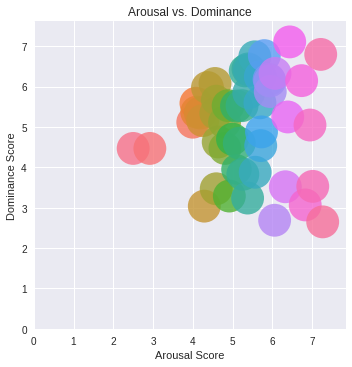

2017-10-03 19:31:32.119245
          _1    _2    _3  sum(_4)
0     people  5.94  6.14       28
1      paper  2.50  4.47       24
2  hurricane  6.83  3.07       18
3       hate  6.95  5.05       14
4       good  5.43  6.41       10


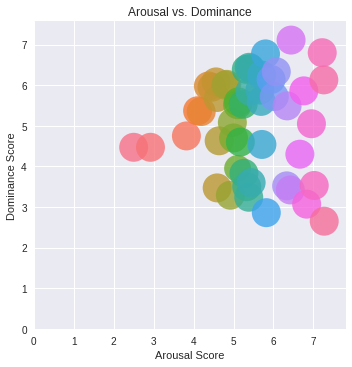

2017-10-03 19:31:48.056153
          _1    _2    _3  sum(_4)
0  hurricane  6.83  3.07       32
1       hate  6.95  5.05       26
2     people  5.94  6.14       25
3      paper  2.50  4.47       24
4       good  5.43  6.41       11


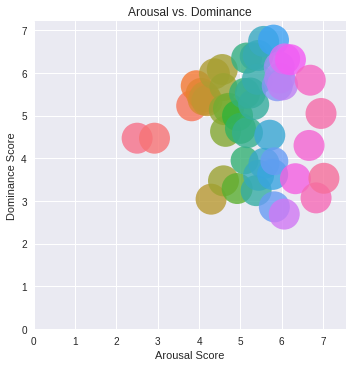

2017-10-03 19:32:04.013321
          _1    _2    _3  sum(_4)
0     people  5.94  6.14       27
1      paper  2.50  4.47       25
2       hate  6.95  5.05       22
3  hurricane  6.83  3.07       19
4       good  5.43  6.41        9


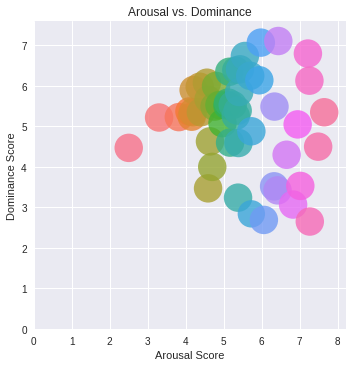

2017-10-03 19:32:19.111489
          _1    _2    _3  sum(_4)
0  hurricane  6.83  3.07       34
1       hate  6.95  5.05       28
2      paper  2.50  4.47       24
3     people  5.94  6.14       19
4       good  5.43  6.41       15


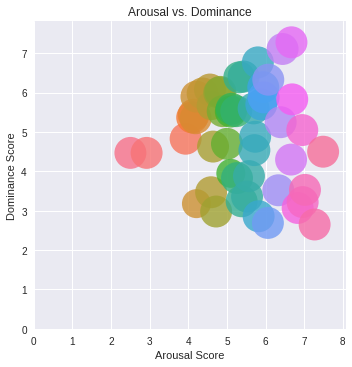

2017-10-03 19:32:34.478426
          _1    _2    _3  sum(_4)
0      paper  2.50  4.47       27
1     people  5.94  6.14       25
2  hurricane  6.83  3.07       23
3       hate  6.95  5.05       20
4       good  5.43  6.41       17


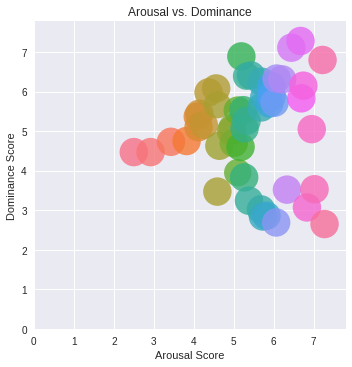

In [16]:
#plot scatterplots of arousal and dominance
import datetime
from IPython import display
import time

count = 0
while count < 10:
    try:
        time.sleep(window_time)
        #display.clear_output(wait=True)
        print(datetime.datetime.now())
        myrows = sqlContext.sql("select * from tweets where _2 is not null")
        myrows = myrows.groupby(["_1", "_2", "_3"]).agg({"_4":"sum"}).sort(desc("sum(_4)")).toPandas()
        myrows["_2"] = myrows._2.astype("float")
        myrows["_3"] = myrows._3.astype("float")
        print(myrows.head(5))
        #plot sentiment of top words by count
        sn.plt.figure( figsize = ( 20, 20 ) )
        sn.lmplot("_2", 
               "_3", 
               data=myrows.head(50), 
               fit_reg=False, 
               hue = "_2",
               palette = "husl", 
               legend = False, 
               size = 5,
               scatter = True, 
               scatter_kws={"marker": "D", 
                            "s": myrows["sum(_4)"] * 30}) 
        plt.title("Arousal vs. Dominance")
        plt.xlabel("Arousal Score")
        plt.ylabel("Dominance Score")
        sn.plt.ylim(0,)
        sn.plt.xlim(0,)
        sn.plt.show()
        count = count + 1
    except ValueError as e:
        print(e) 

In [17]:
ssc.stop()